<!--
Pavel Prochazka 
pavel@prochazka.info
v0.2.0 18.12.2016
-->

# WNC Demodulation and Performance

Within this section, we bring ligth to the relay demodulator in WNC and complete the performance evaluation in the butterfly wireless network with the constellation design shown a section ago.

In [1]:
# Initialization
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##Relay Demodulator

The maximum likelihood decoder of the relay data is given by $d_R=\arg \max_{d_R} p(x_R|d_R).$ Using some assumptions, one can derive $$p(x_R|d_R) = \sum_{d_A, d_B: f(d_A,d_B)=d_R}p(x_R|d_A,d_B)$$ up to a scaling constant. Considering the Gaussian pdf, the likelihood becomes to
$$p(x_R|d_R) = \sum_{d_A, d_B: f(d_A,d_B)=d_R}\exp\left(-\frac{\left|x_R-\mathcal{M}_A(d_A)-h \mathcal{M}_B(d_B)\right|^2}{\sigma_{W_R}^2}\right).$$

One can see that minimum distance decision criterion used for visualization in the previous section is associated with approximation $$\sum_{d_A, d_B: f(d_A,d_B)=d_R}\exp\left(-\frac{\left|x_R-\mathcal{M}_A(d_A)-h \mathcal{M}_B(d_B)\right|^2}{\sigma_{W_R}^2}\right)\approx \max_{d_A, d_B: f(d_A,d_B)=d_R}\exp\left(-\frac{\left|x_R-\mathcal{M}_A(d_A)-h \mathcal{M}_B(d_B)\right|^2}{\sigma_{W_R}^2}\right).$$ Within this tutorial, this approximation will be used for visualizations, nevertheless the error rate is evaluated upon true metric.

Other links within the network (that is side and relay to destination links) are point to point and thus minimum distance decision criterion is equal to maximum likelihood estimator as in conventional communication theory.

## Visualization of SNR in Received Constellations

The quality of all links are described by signal to noise ratio (SNR or $\gamma$) that is unambiguously related to variance of the Gaussian noise ($\sigma_W^2$), since unit power restriction is assumed in all transmiting nodes. The relation
$$\sigma_W^2 = 10^{\frac{\gamma}{10}}$$ is described as:

In [2]:
def SNR2sigma2w(SNR):
    alpha = 10**(float(SNR)/10)
    return 1.0/alpha

The Gaussian noise is generated according to this by:

In [3]:
import numpy as np
SNR = 8 # Signal to noise ratio
L = 1000 # Vector length
sigma2w = SNR2sigma2w(SNR)
# Samples of complex valued Gaussian noise
w = np.sqrt(sigma2w/2) * (np.random.randn(L) + 1j * np.random.randn(L))

One can ensure that the properties of the generated noise fit the assumptions (the mean should tend to zero and mean energy to $\sigma_W^2$ with increasing $L$:

In [4]:
print 'Empirical mean:%.3f'%(1./L * np.sum(w))
print 'Empirical mean energy:%.3f,'%(1./L * np.sum(np.abs(w)**2))
print 'Sigma2w:%.3f'%sigma2w

Empirical mean:0.013
Empirical mean energy:0.153,
Sigma2w:0.158


The pdf of the zero mean Gaussian noise is given by $$p(w)=\frac{1}{\sigma_W\pi}\exp\left(-\frac{|w|^2}{\sigma_W^2}\right)$$.

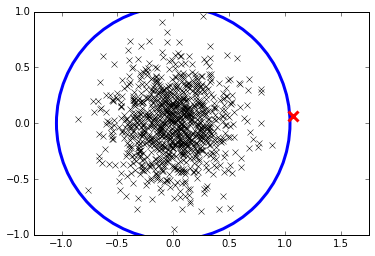

In [5]:
from matplotlib.patches import Polygon, Circle
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.axis('equal')

Pe = 1e-3
d = np.sqrt(-sigma2w*np.log(Pe))
c = plt.Circle((0, 0), d, color='blue',fill=None, lw=3)
w = np.sqrt(sigma2w/2) * (np.random.randn(L) + 1j * np.random.randn(L))
ax.add_artist(c)

ax.plot(np.real(w[np.abs(w)<d]), np.imag(w[np.abs(w)<d]), 'kx')
ax.plot(np.real(w[np.abs(w)>=d]), np.imag(w[np.abs(w)>=d]), 'rx', ms=10,mew=3)


##Perf

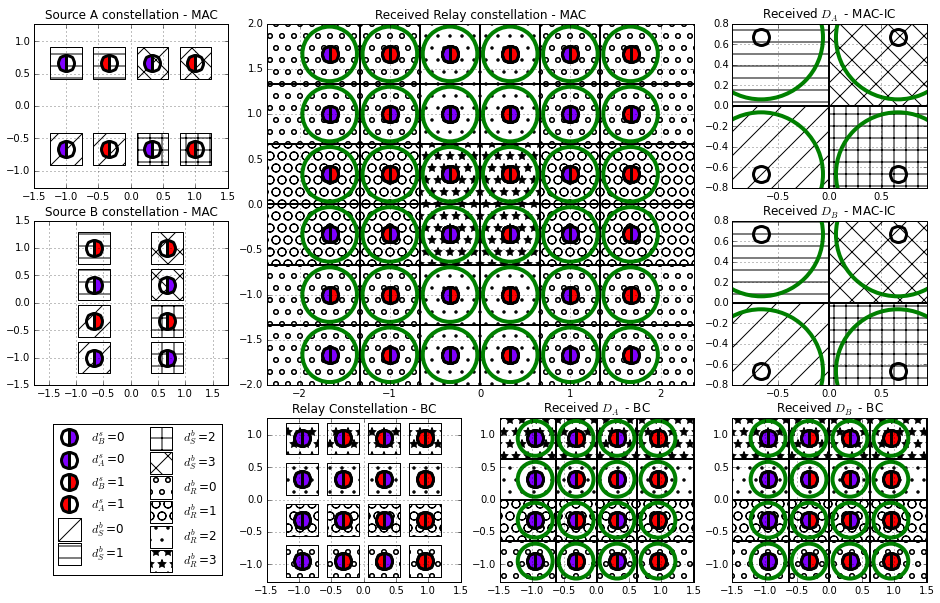

In [11]:
from Constellation_Design_lib import draw_Constellations_IC_withErrCirc
Nb = 2
Ns = 1
h = 1. 
gMAC = 21 
gBC = 22 
gHSI = 15
draw_Constellations_IC_withErrCirc(Nb, Ns, h, gMAC, gBC, gHSI)